## BÀI TẬP

In [1]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [2]:
# Số câu hỏi và xác suất lựa chọn đáp án đúng ở một câu trả lời
n, p = 10, 0.25

In [3]:
# Số câu đúng của bạn sinh viên trong 10 lần kiểm tra.
correct= binom.rvs(n, p, size=10)
print(correct)

[3 3 2 1 5 2 4 2 1 2]


In [4]:
# Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm.
scores = 4*correct - 2*(n-correct)
pro_scores = (scores==4).mean()
print(pro_scores)

0.1


In [5]:
# Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)
print(binom.mean(n, p))
print(binom.var(n, p))

2.5
1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [6]:
# Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.
mu = 3
print(poisson.pmf(1, mu))
print(poisson.pmf(2, mu))
print(poisson.pmf(3, mu))

0.14936120510359185
0.22404180765538775
0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [8]:
mu = 500
sigma = np.sqrt(16)
# Tỉ lệ mỗi loại
p1 = 1 - norm(mu, sigma).cdf(505)
p2 = norm(mu, sigma).cdf(505) - norm(mu, sigma).cdf(495)
p3 = norm(mu, sigma).cdf(495)
print(p1, p2, p3)

0.10564977366685535 0.7887004526662893 0.10564977366685535


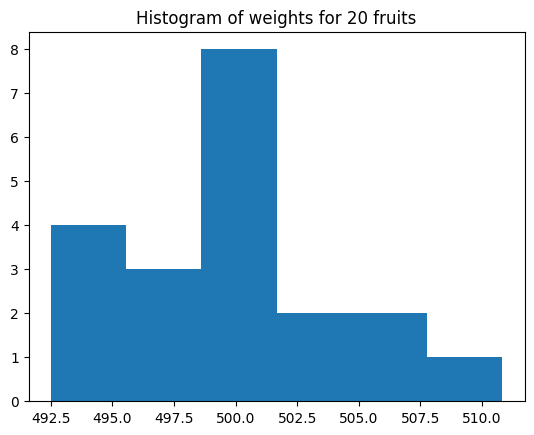

Trung bình của 20 fruits: 499.9537806968291
Độ lệch chuẩn: 4.4924289168266425


In [10]:
#lấy mẫu 20
sample_20 = np.random.normal(mu, sigma, 20)
#vẽ histogram
plt.hist(sample_20, bins='auto')
plt.title("Histogram of weights for 20 fruits")
plt.show()
print(f"Trung bình của 20 fruits: {np.mean(sample_20)}")
print(f"Độ lệch chuẩn: {np.std(sample_20)}")

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [22]:
roll = np.random.randint(1, 7, 5000)
# Xác suất xuất hiện là 4
p = (roll == 4).mean()
print(p)
# Xác suất xuất hiện là lớn hơn hoặc bằng 4
p = (roll >= 4).mean()
print(p)
#Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.
p = (roll == 6).mean() / (roll >= 4).mean()
print(p)

0.1694
0.4968
0.33091787439613524


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

22
44
33.0
35.0
37.0


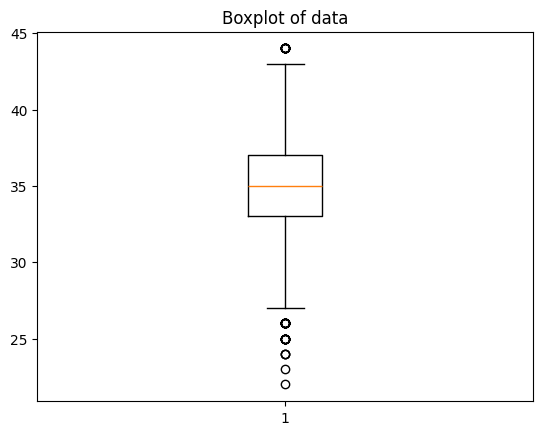

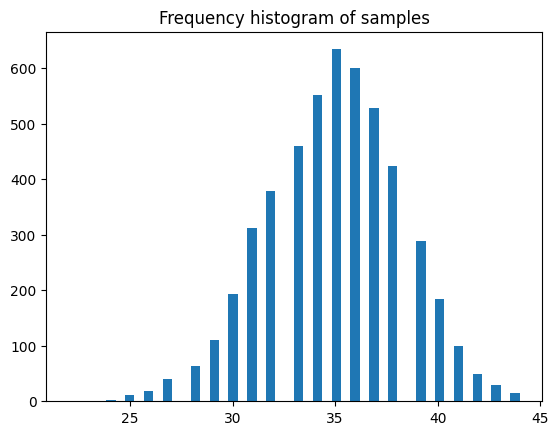

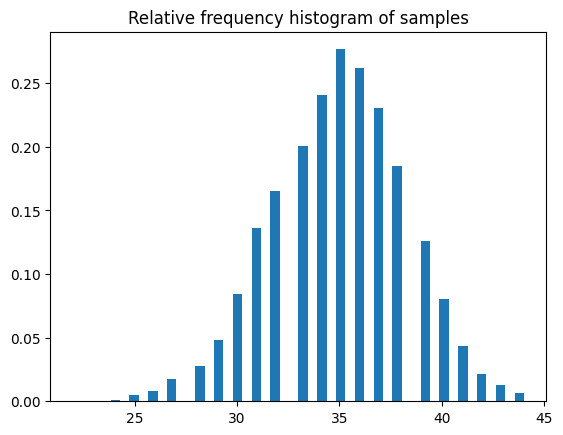

In [24]:
n, p = 50, 0.7
#a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3
data = binom.rvs(n, p, size=5000)
print(np.min(data))
print(np.max(data))
print(np.percentile(data, 25))
print(np.percentile(data, 50))
print(np.percentile(data, 75))
# Vẽ boxplot
plt.boxplot(data)
plt.title("Boxplot of data")
plt.show()
# Vẽ các đồ thị: tần số, tần suất
plt.hist(data, bins='auto', density=False)
plt.title("Frequency histogram of samples")
plt.show()

plt.hist(data, bins='auto', density=True)
plt.title("Relative frequency histogram of samples")
plt.show()
